# Demystifying the Beigel-Reingold-Spielman construction

In [1]:
from math import *
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.rcParams['font.size'] = '16'
color_palette = sns.color_palette()

In [2]:
### A helper to plot the graph of a function
def plot_func(f, xs=None, label=None, title=None):
    if xs is None:
        xs = np.arange(-100,100,0.5)
    if label is None:
        label="(unknown)"
        
    ys = np.array(list(map(f, xs)))
    
    plt.figure(figsize=(12,8))
    plt.grid()
    plt.axvline(x=0, color="black", linewidth="1")
    plt.axhline(y=0, color="black", linewidth="1")

    if title is not None:
        plt.title(title)
    
    plt.plot(xs, ys, label=label, linewidth=2)
    plt.legend()
    plt.show()    

# The hyperbolic tangent

$$\tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$$

Often, this function is used as a smooth approximation for the sign function. 

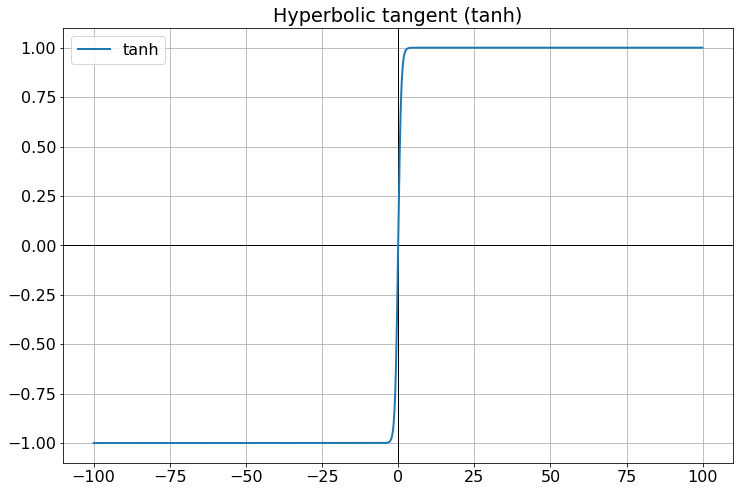

In [8]:
plot_func(tanh, np.arange(-100,100, 0.1), label="tanh", title="Hyperbolic tangent (tanh)")

## Trying the same with truncated exponentials

In [4]:
def trunc_exp(x, t=20):
    s = 0.0
    for i in range(t+1):
        s += x**i / factorial(i)
    return s

def tanh_trunc(x, t):
    a = trunc_exp(x,t)
    b = trunc_exp(-x,t)
    return (a-b)/(a+b)

def tanh_proxy(x, f):
    return (f(x) - f(-x))/(f(x) + f(-x))

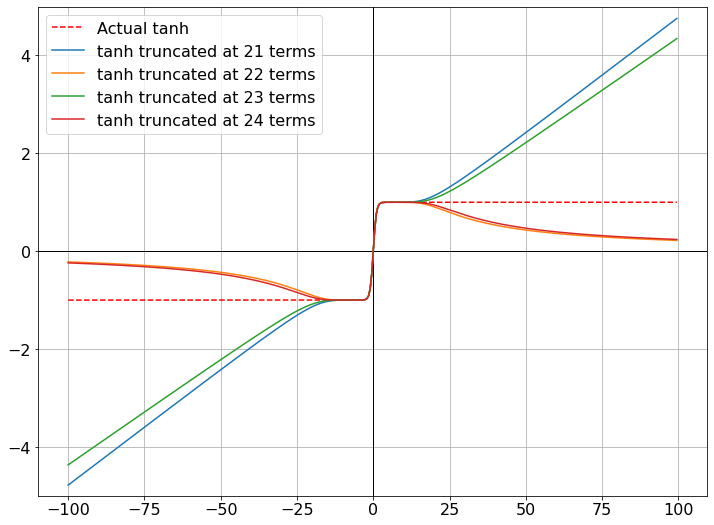

In [5]:
plt.figure(figsize=(12,9))
plt.grid()
plt.axvline(x=0, color="black", linewidth="1")
plt.axhline(y=0, color="black", linewidth="1")

xs = np.arange(-100, 100, 0.5)
ys = np.array(list(map(tanh, xs)))
plt.plot(xs,ys,color="red",label="Actual tanh", linestyle="dashed")

colors = iter(color_palette)
for i in range(21,25):
    ys = np.array(list(map(lambda x: tanh_trunc(x,i), xs)))
    plt.plot(xs,ys, color=next(colors), label=f"tanh truncated at {i} terms")

plt.legend()
plt.ylim(top=5, bottom=-5)
plt.show()

Doesn't quite work :-(

### Why doesn't it work?


$$
\begin{align*}
\operatorname{tanh-proxy}(f,x) &= \frac{f(x) - f(-x)}{f(x) + f(-x)}\\
& = \frac{f(x) + f(-x)}{f(x) + f(-x)} - \frac{2f(-x)}{f(x) + f(-x)}\\
& = 1 + \frac{2}{\left(\frac{f(x)}{-f(-x)}\right) - 1}
\end{align*}
$$

If we can somehow ensure that $f(x) > 10 \cdot (- f(-x)) > 0$ for all $x > 0$, then we will have that $1 \leq\operatorname{tanh-proxy}(f,x) \leq 1.22..$ for all $x > 0$. 

One issue is that, for any odd-degree polynomial, for large enough $x$ we will always have $f(x) \approx -f(-x)$.
Therefore, $\operatorname{tanh-proxy}(f,x)$ shoots to $\infty$ as $x$ grows. Similarly, if $f$ is an even-degree polynomial, then $f(x) \approx f(-x)$ for large $x$ and this means that $\operatorname{tanh-proxy}(f,x)$ goes to $0$ in this case as $x$ grows. 


If we wish to somehow ensure that $f(x) > 10 \cdot (- f(-x))$, we want to choose an odd-degree polynomial f, and also figure out a way to keep giving some advantage to the positive side, at least until $x \leq 2^n$.


# The Beigel-Reingold-Spielman function

$$
\begin{align*}
\operatorname{BRS}_n(x) &= (x+1) \prod_{i=1}^n (x + 2^i)^2\\
\operatorname{BRS-tanh}_n(x) &= \frac{\operatorname{BRS}_n(x)-\operatorname{BRS}_n(-x)}{\operatorname{BRS}_n(x)+\operatorname{BRS}_n(-x)}
\end{align*}
$$


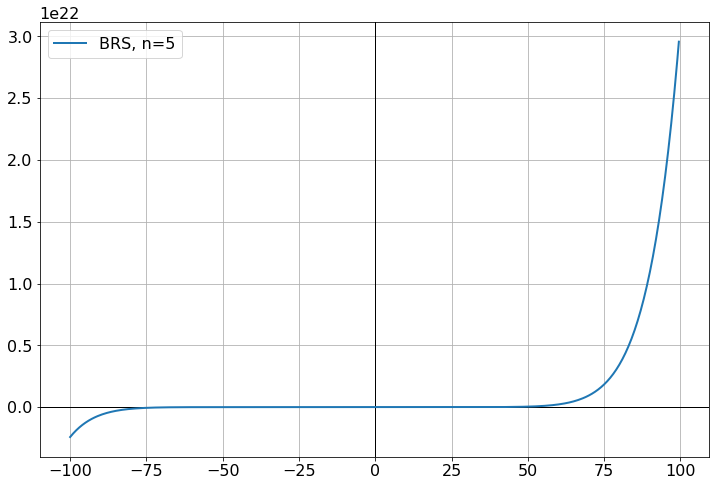

In [6]:
def BRS(x,n):
    out = (x+1)
    for i in range(1,n+1):
        out *= (x + (2**i))**2
    return out

def BRS_tanh(x,n=5):
    return (BRS(x,n) - BRS(-x,n))/(BRS(x,n) + BRS(-x,n))

plot_func(lambda x: BRS(x,5), label="BRS, n=5")

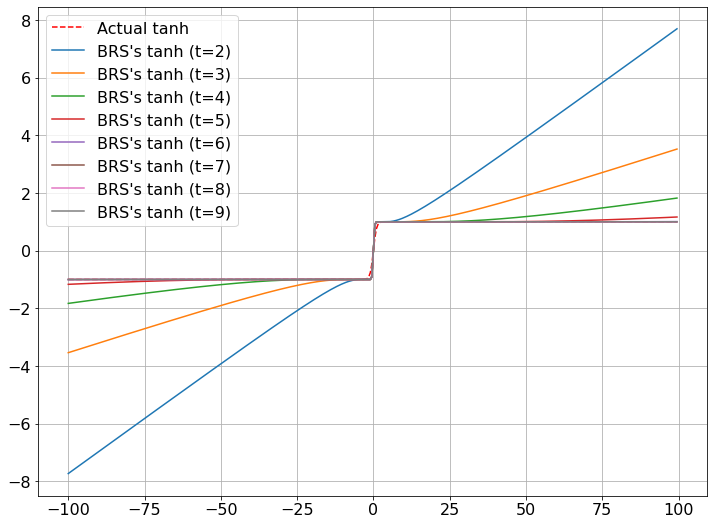

In [7]:
plt.figure(figsize=(12,9))
plt.grid()
xs = np.arange(-100, 100, 0.5)
ys = np.array(list(map(lambda x: tanh(x),xs)))
plt.plot(xs,ys,color="red",label="Actual tanh", linestyle="dashed")

colors = iter(color_palette)
for t in range(2,10):
    ys = np.array(list(map(lambda x: BRS_tanh(x,t), xs)))
    plt.plot(xs,ys,color=next(colors),label=f"BRS's tanh (t={t})")

plt.legend()
plt.show()

## That's awesome!


Reference: ["PP is closed under intersection" by Richard Beigel, Nick Reingold and Daniel Spielman](https://www.sciencedirect.com/science/article/pii/S0022000085710173)